# KNN/K近邻算法原理

## 问题

In [3]:
rowdata = {'颜色深度': [14.13,13.2,13.16,14.27,13.24,12.07,12.43,11.79,12.37,12.04],
           '酒精浓度': [5.64,4.28,5.68,4.80,4.22,2.76,3.94,3.1,2.12,2.6], 
           '品种': [0,0,0,0,0,1,1,1,1,1]}
# 0 代表 “黑皮诺”，1 代表 “赤霞珠” 
rowdata

{'颜色深度': [14.13, 13.2, 13.16, 14.27, 13.24, 12.07, 12.43, 11.79, 12.37, 12.04],
 '酒精浓度': [5.64, 4.28, 5.68, 4.8, 4.22, 2.76, 3.94, 3.1, 2.12, 2.6],
 '品种': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]}

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
wine_data = pd.DataFrame(rowdata) 

wine_data

,颜色深度,酒精浓度,品种
0,14.13,5.64,0
1,13.20,4.28,0
2,13.16,5.68,0
3,14.27,4.80,0
4,13.24,4.22,0
5,12.07,2.76,1
6,12.43,3.94,1
7,11.79,3.10,1
8,12.37,2.12,1
9,12.04,2.60,1


## 可视化说明

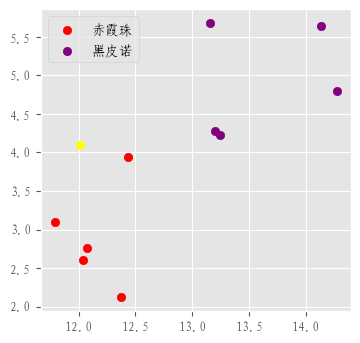

In [27]:
# 解决坐标轴刻度负号乱码 
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题 
plt.rcParams['font.sans-serif'] = ['FangSong_GB2312']

# 使用ggplot风格绘制
plt.style.use('ggplot')

# 设置图形大小及清晰度
plt.figure(figsize=(4,4),dpi=100)

# 对wine_data进行数据可视化
x = np.array(wine_data.iloc[:,0:2]) # 返回前两列，为特征（酒精的属性）
y = np.array(wine_data.iloc[:,-1]) # 返回最后一列，为标签

# 新倒的红酒的颜色深度和酒精浓度[12.3,4.1]
new_data = np.array([12.01,4.1])

plt.scatter(x[y==1,0],x[y==1,1],color='red',label='赤霞珠')
plt.scatter(x[y==0,0],x[y==0,1],color='purple',label='黑皮诺')

plt.scatter(new_data[0],new_data[1],color='yellow')

plt.legend()

## 计算标记点到所有样本的距离

In [29]:
# .values 转化为array数组
data = wine_data.iloc[:,0:2].values
data

array([[14.13,  5.64],
       [13.2 ,  4.28],
       [13.16,  5.68],
       [14.27,  4.8 ],
       [13.24,  4.22],
       [12.07,  2.76],
       [12.43,  3.94],
       [11.79,  3.1 ],
       [12.37,  2.12],
       [12.04,  2.6 ]])

In [9]:
# 转化为多维数组
new_cup = np.array([[12.3,4.1]])
new_cup

array([[12.3,  4.1]])

In [30]:
# 求黄点到各点的距离
(new_cup - data)**2

array([[3.3489, 2.3716],
       [0.81  , 0.0324],
       [0.7396, 2.4964],
       [3.8809, 0.49  ],
       [0.8836, 0.0144],
       [0.0529, 1.7956],
       [0.0169, 0.0256],
       [0.2601, 1.    ],
       [0.0049, 3.9204],
       [0.0676, 2.25  ]])

二维距离计算公式
$d=\sqrt{(x_A-x_B)^2+(y_A-y_B)^2}$

In [32]:
# 第一列数值
a = ((new_cup - data)**2)[:,0]
a

array([3.3489, 0.81  , 0.7396, 3.8809, 0.8836, 0.0529, 0.0169, 0.2601,
       0.0049, 0.0676])

In [33]:
# 第二列数值
b = ((new_cup - data)**2)[:,1]
b

array([2.3716, 0.0324, 2.4964, 0.49  , 0.0144, 1.7956, 0.0256, 1.    ,
       3.9204, 2.25  ])

In [34]:
distance = np.sqrt(a+b)
distance

array([2.39175668, 0.91782351, 1.79888855, 2.09066975, 0.94762862,
       1.35959553, 0.20615528, 1.12254176, 1.98123699, 1.52236658])

## 对Distanc进行排序

In [14]:
np.sort(distance)

array([0.20615528, 0.91782351, 0.94762862, 1.12254176, 1.35959553,
       1.52236658, 1.79888855, 1.98123699, 2.09066975, 2.39175668])

In [15]:
 np.argsort(distance) # 返回升序排序的索引值

array([6, 1, 4, 7, 5, 9, 2, 8, 3, 0])

In [16]:
# 最近三个点的索引
k3 = np.argsort(distance)[:3]
k3

array([6, 1, 4])

In [17]:
y = wine_data.品种
y

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    1
9    1
Name: 品种, dtype: int64

In [18]:
# 返回三个点的类型，0 代表 “黑皮诺”，1 代表 “赤霞珠” 
[y[i] for i in k3]

[1, 0, 0]

## 判断类别

In [20]:
# 判断得出为0，即黑皮诺
pd.Series([y[i] for i in k3]).value_counts().idxmax()

0

## 封装

In [37]:
# 把以上过程封装为函数

def KNN(x): # x是输入的点，返回类别
    # 把10个训练数据提取到data中
    data = wine_data.iloc[:,:2].values

    # 新数据点与10个一维数组的欧式距离
    # 数据点第一个特征与10个点的欧式距离
    a = ((x - data)**2)[:,0]
    # 数据点第二个特征与10个点的欧式距离
    b = ((x - data)**2)[:,1]
    # 得到数据点与10个点的欧式距离
    distance = np.sqrt(a+b)
    # 排序找出最近的K个点， K=3
    k3 = np.argsort(distance)[:3]
    # 判断类别 
    y = wine_data.品种
    #根据频数判断属于哪一类
    return pd.Series([y[i] for i in k3]).value_counts().idxmax()

In [38]:
KNN([[12.01,4.1]])

1

In [44]:
# 对上面函数进行优化，提供更多参数选择
def New_KNN(new_data,dataSet,k):
    '''
    函数功能：KNN分类器
    参数说明：
    new_data:需要预测分类的数据集
    dataSet:已知分类标签的数据集
    k:k-近邻算法参数，选择举例最小的k个点
    return:返回分类结果
    '''
    from math import sqrt
    from collections import Counter
    import numpy as np
    import pandas as pd
    
    result = []
    distance = [sqrt(np.sum((x - new_data)**2)) for x in np.array(dataSet.iloc[:,0:2])]
    sort_dist = np.argsort(distance)
    topk = [dataSet.iloc[:,-1][i] for i in sort_dist[:k]]
    result.append(pd.Series(topk).value_counts().index[0])
    
    return result

In [45]:
new_data = np.array([13,4.9])
k = 3
New_KNN(new_data,wine_data,k)

[0]

# 使用sklearn调用KNN

## 代码示例

In [8]:
from sklearn.neighbors import KNeighborsClassifier
# 0 代表 “黑皮诺”，1 代表 “赤霞珠”
clf = KNeighborsClassifier(n_neighbors = 3)
clf = clf.fit(wine_data.iloc[:,0:2], wine_data.iloc[:,-1]) 
result = clf.predict([[12.8,4.1]]) # 返回预测的标签
result

array([0])

In [9]:
# 对模型进行一个评估，接口score返回预测的准确率 
score = clf.score([[12.8,4.1]],[0]) 
score

1.0

In [10]:
clf.predict_proba([[12.8,4.1]]) 
#输出数据[12.8,4.1]为标签0的概率(0.666...)，以及标签为1的概率(0.333...)

array([[0.66666667, 0.33333333]])

## 案例：乳腺癌

### 导入数据

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [51]:
import pandas as pd
import numpy as np 
#读取数据集
data = load_breast_cancer()

#DateFrame格式显示
X = data.data
y = data.target
name = ['平均半径','平均纹理','平均周长','平均面积',
        '平均光滑度','平均紧凑度','平均凹度', 
        '平均凹点','平均对称','平均分形维数', 
        '半径误差','纹理误差','周长误差','面积误差', 
        '平滑度误差','紧凑度误差','凹度误差', '凹点误差',
        '对称误差', '分形维数误差','最差半径','最差纹理', 
        '最差的边界','最差的区域','最差的平滑度', 
        '最差的紧凑性','最差的凹陷','最差的凹点', 
        '最差的对称性','最差的分形维数','患病否']

data = np.concatenate((X,y.reshape(-1,1)),axis=1)
table = pd.DataFrame(data=data,columns=name)
table.head()

,平均半径,平均纹理,平均周长,平均面积,平均光滑度,平均紧凑度,平均凹度,平均凹点,平均对称,平均分形维数,...,最差纹理,最差的边界,最差的区域,最差的平滑度,最差的紧凑性,最差的凹陷,最差的凹点,最差的对称性,最差的分形维数,患病否
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### 划分测试集与训练集

In [25]:
X = table.iloc[:,:-1]
y = table.iloc[:,-1]
X.head()
y.head()

,平均半径,平均纹理,平均周长,平均面积,平均光滑度,平均紧凑度,平均凹度,平均凹点,平均对称,平均分形维数,...,最差半径,最差纹理,最差的边界,最差的区域,最差的平滑度,最差的紧凑性,最差的凹陷,最差的凹点,最差的对称性,最差的分形维数
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 患病否, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

# 划分训练集和测试集
# random_state 随机种子，类似于random.seed()
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=420) 

clf = KNeighborsClassifier(n_neighbors=7)

clf = clf.fit(Xtrain,Ytrain)

score = clf.score(Xtest,Ytest)

score

0.9385964912280702

### 绘制学习曲线

([<matplotlib.axis.XTick at 0x7fd40dae54c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

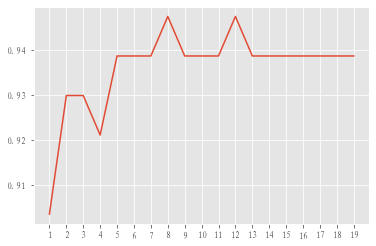

In [29]:
score = []

k = range(1,20)

for i in k:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf = clf.fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
plt.plot(k,score)
plt.xticks(range(1,20))
plt.show()

### 带交叉验证的学习曲线

#### 划分特征数据x与标签y

In [30]:
X = table.iloc[:,:-1]
y = table.iloc[:,-1]

In [44]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=.2,random_state=150)

#### 建模

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score as CVS
from sklearn.preprocessing import MinMaxScaler as mms

([<matplotlib.axis.XTick at 0x7fd40e0e88e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

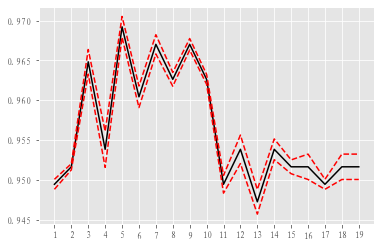

In [53]:
# 归一化
Xtrain = mms().fit(Xtrain).transform(Xtrain)
Xtest = mms().fit(Xtest).transform(Xtest)

mean = []
var = []

for i in range(1,20):
    # K值不能设置过大，过小 --学习曲线可以找k
    KNN = KNeighborsClassifier(n_neighbors=i)
    # 交叉验证  折数不能过大、过小
    result = CVS(KNN,Xtrain,Ytrain,cv=5) # 5折、6折，比较好
    
    mean.append(result.mean())
    var.append(result.var())
    
mean = np.array(mean)
var = np.array(var)

plt.plot(range(1,20),mean,color='k')
plt.plot(range(1,20),mean+var*5,color='r',linestyle='--')
plt.plot(range(1,20),mean-var*5,color='r',linestyle='--')
plt.xticks(range(1,20))
plt.show()

In [46]:
KNN_K10 = KNeighborsClassifier(n_neighbors=14)
clf_k10 = KNN_K10.fit(Xtrain,Ytrain)

clf_k10.score(Xtest,Ytest)

0.956140350877193

### 归一化（python实现）

In [51]:
data = [[-1,2],[-0.5,6],[0,10],[1,18]]
data_01 = pd.DataFrame(data).iloc[:,0]
(data_01-np.min(data_01,axis=0))/(np.max(data_01,axis=0)-np.min(data_01,axis=0))

0    0.00
1    0.25
2    0.50
3    1.00
Name: 0, dtype: float64